SBERT sentence encoding and comparision

In [12]:
%pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [2]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

model = SentenceTransformer('bert-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
doc1 = "I like to eat ice cream"
doc2 = "I do not like to eat ice cream"
doc3 = "I like to eat ice cream and pizza"
doc4 = 'I love dogs and pizza'
doc5 = 'there are 7 days in a week'

In [7]:
sentence_embeddings = model.encode([doc1, doc2, doc3, doc4, doc5])
sentence_embeddings

array([[-0.7796938 ,  0.1710923 ,  0.5412493 , ...,  0.43542174,
        -0.38664854,  0.6650164 ],
       [ 0.09265601,  0.89157546,  0.97304904, ...,  0.21222754,
        -0.68878746,  0.1858646 ],
       [-0.91768324,  0.42220536,  0.26463467, ...,  0.38621655,
        -0.02530371,  0.3157185 ],
       [-0.4435862 ,  0.4803068 ,  0.74871814, ...,  0.20911299,
         0.66462547,  0.28981856],
       [ 0.34393358, -0.22866562,  1.5454936 , ..., -0.47158247,
         1.1988033 ,  0.04407065]], dtype=float32)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(sentence_embeddings)
cosine_similarities

array([[ 0.9999999 ,  0.42869642,  0.8808006 ,  0.51780117,  0.07229152],
       [ 0.42869642,  1.0000002 ,  0.3631547 ,  0.13015461,  0.11535509],
       [ 0.8808006 ,  0.3631547 ,  1.0000002 ,  0.72146785,  0.02947992],
       [ 0.51780117,  0.13015461,  0.72146785,  1.        , -0.03531507],
       [ 0.07229152,  0.11535509,  0.02947992, -0.03531507,  0.99999994]],
      dtype=float32)

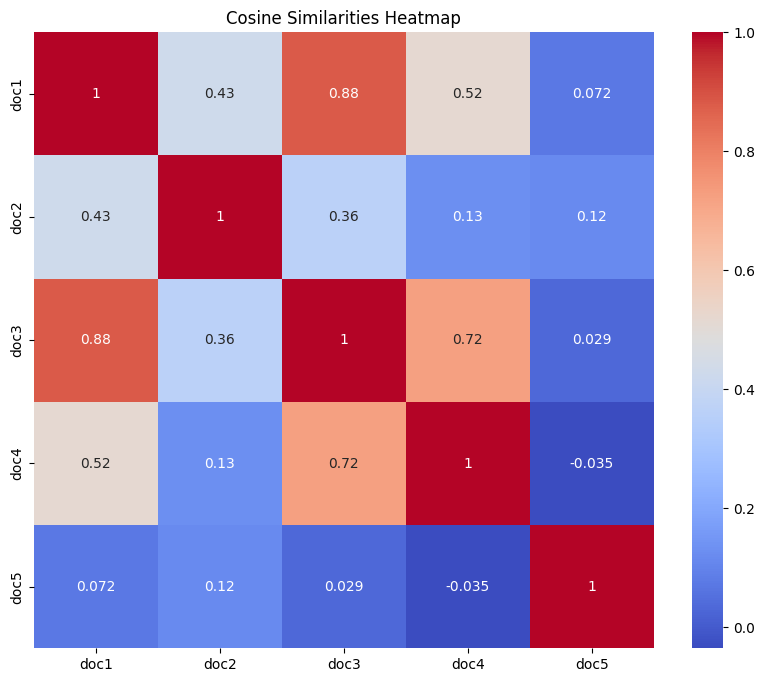

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, annot=True, cmap='coolwarm', xticklabels=['doc1', 'doc2', 'doc3', 'doc4', 'doc5'], yticklabels=['doc1', 'doc2', 'doc3', 'doc4', 'doc5'])
plt.title('Cosine Similarities Heatmap')
plt.show()